In [3]:
pip install tensorflow opencv-python matplotlib

In [8]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt


In [7]:
image_ext = ['.jpg', '.jpeg', '.png', '.bmp']
training_data = '/content/drive/MyDrive/test'

for filename in os.listdir(training_data):
  if any(filename.endswith(ext) for ext in image_ext):
    print(f"Image file: {filename}","Size:",os.path.getsize(os.path.join(training_data, filename)))


Image file: M1309534046LE_cal_echo_9_2.png Size: 713409
Image file: M161142858RE_cal_echo_1_2.png Size: 657439
Image file: M1183658592LE_cal_echo_23_0.png Size: 632959
Image file: M1303640934LE_cal_echo_map5_7_0.png Size: 618097
Image file: M1305967189RE_cal_echo_11_2.png Size: 708669
Image file: M115143943RE_cal_echo_2_2.png Size: 713990
Image file: M1303619844LE_cal_echo_26_2.png Size: 679050
Image file: M1229577647LE_cal_echo_14_4.png Size: 697655
Image file: mars_crater (20).jpg Size: 1080277
Image file: mars_crater (16).jpg Size: 832613
Image file: mars_crater (5).jpg Size: 834693
Image file: mars_crater (15).jpg Size: 1096429
Image file: mars_crater (32).jpg Size: 647639
Image file: mars_crater (66).jpg Size: 745792
Image file: mars_crater (88).jpg Size: 3083133
Image file: mars_crater (35).jpg Size: 1027953
Image file: mars_crater (58).jpg Size: 1650396
Image file: mars_crater (21).jpg Size: 1081209
Image file: mars_crater (75).jpg Size: 727894
Image file: mars_crater (17).jpg S

(1400, 1400, 3)


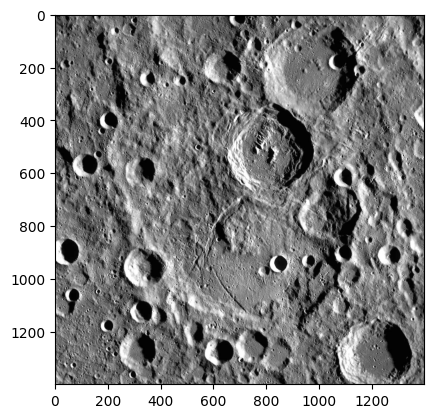

In [2]:
img = cv2.imread(os.path.join(training_data, 'Janssen_LRO.jpg'))

# Check if the image was loaded correctly
if img is not None:
  print(img.shape)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
else:
  print("Failed to load image.")

  # Print the current working directory to verify the path
  import os
  print("Current working directory:", os.getcwd())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.5 MB/s eta 0:00:00


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def enhance_depth_map(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    norm_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(norm_img)

    jet_map = cv2.applyColorMap(clahe_img, cv2.COLORMAP_JET)
    rainbow_map = cv2.applyColorMap(clahe_img, cv2.COLORMAP_RAINBOW)

    elevation_colors = np.array([
        [0, 0, 255],     # Deep blue for lowest points
        [0, 255, 255],   # Cyan
        [0, 255, 0],     # Green
        [255, 255, 0],   # Yellow
        [255, 0, 0]      # Red for highest points
    ])

    # Interpolating the custom color map across 256 values
    lut = np.zeros((256, 3), dtype=np.uint8)
    for i in range(256):
        fraction = i / 255
        idx = int(fraction * (len(elevation_colors) - 1))
        next_idx = min(idx + 1, len(elevation_colors) - 1)
        interp_fraction = (fraction * (len(elevation_colors) - 1)) % 1
        lut[i] = (1 - interp_fraction) * elevation_colors[idx] + interp_fraction * elevation_colors[next_idx]

    custom_map = np.zeros((clahe_img.shape[0], clahe_img.shape[1], 3), dtype=np.uint8)

    for i in range(3):  # Loop over the three channels (R, G, B)
        custom_map[:, :, i] = cv2.LUT(clahe_img, lut[:, i])

    x = np.arange(0, clahe_img.shape[1])
    y = np.arange(0, clahe_img.shape[0])
    X, Y = np.meshgrid(x, y)
    Z = clahe_img

    fig = plt.figure(figsize=(20, 15))

    ax1 = fig.add_subplot(231)
    ax1.imshow(norm_img, cmap='gray')
    ax1.set_title('Original Depth Map')
    ax1.axis('off')

    ax2 = fig.add_subplot(232)
    ax2.imshow(clahe_img, cmap='gray')
    ax2.set_title('CLAHE Enhanced')
    ax2.axis('off')

    ax3 = fig.add_subplot(233)
    ax3.imshow(cv2.cvtColor(jet_map, cv2.COLOR_BGR2RGB))
    ax3.set_title('Jet Color Map')
    ax3.axis('off')

    ax4 = fig.add_subplot(234)
    ax4.imshow(cv2.cvtColor(rainbow_map, cv2.COLOR_BGR2RGB))
    ax4.set_title('Rainbow Color Map')
    ax4.axis('off')

    # Custom elevation map
    ax5 = fig.add_subplot(235)
    ax5.imshow(cv2.cvtColor(custom_map, cv2.COLOR_BGR2RGB))
    ax5.set_title('Custom Elevation Map')
    ax5.axis('off')

    # 3D surface plot
    ax6 = fig.add_subplot(236, projection='3d')
    surf = ax6.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False, shade=True)
    ax6.set_title('Enhanced 3D Surface Plot')
    ax6.set_xlabel('X')
    ax6.set_ylabel('Y')
    ax6.set_zlabel('Depth')
    fig.colorbar(surf, ax=ax6, shrink=0.5, aspect=5)
    ax6.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

    # Stack the images
    final_image = np.zeros_like(custom_map, dtype=np.uint8)
    alpha = 0.7  # Set the transparency level

    # Overlay images
    final_image = cv2.addWeighted(final_image, 1, cv2.cvtColor(norm_img, cv2.COLOR_GRAY2BGR), alpha, 0)
    final_image = cv2.addWeighted(final_image, 1, cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2BGR), alpha, 0)
    final_image = cv2.addWeighted(final_image, 1, jet_map, alpha, 0)
    final_image = cv2.addWeighted(final_image, 1, rainbow_map, alpha, 0)
    final_image = cv2.addWeighted(final_image, 1, custom_map, alpha, 0)

    # Sobel filter on the final image to enhance edges
    final_gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(final_gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(final_gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Multi-scale filtering (Gaussian Pyramid)
    pyr_down = cv2.pyrDown(final_gray)
    pyr_up = cv2.pyrUp(pyr_down)
    multi_scale = cv2.addWeighted(final_gray, 0.5, pyr_up, 0.5, 0)

    # Sobel and Multi-scale filtering with the final image
    final_enhanced = cv2.addWeighted(sobel_combined, 0.4, multi_scale, 0.6, 0)

    plt.figure(figsize=(3,3))  # Match this size with the other plots
    plt.imshow(final_enhanced, cmap='gray')
    plt.title('Final Enhanced Depth Map with Sobel and Multi-scale Filtering')
    plt.axis('off')
    plt.show()

    # Crater border detection
    final_enhanced_uint8 = cv2.normalize(final_enhanced, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    edges = cv2.Canny(final_enhanced_uint8, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_area = 20
    min_circularity = 0.
    crater_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter > 0:
            circularity = 4 * np.pi * area / (perimeter * perimeter)
            if area > min_area and circularity > min_circularity:
                crater_contours.append(contour)

    crater_boundaries = cv2.cvtColor(final_enhanced_uint8, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(crater_boundaries, crater_contours, -1, (0, 255, 0), 2)


    plt.figure(figsize=(3, 3))  # Match this size with the other plots
    plt.imshow(cv2.cvtColor(crater_boundaries, cv2.COLOR_BGR2RGB))
    plt.title('Depth Map with Detected Crater Boundaries')
    plt.axis('off')
    plt.show()

    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, final_enhanced, cmap='viridis', alpha=0.8)

    for contour in crater_contours:
        x_contour = contour[:, 0, 0]
        y_contour = contour[:, 0, 1]
        z_contour = final_enhanced[y_contour, x_contour]
        ax.plot(x_contour, y_contour, z_contour, color='red', linewidth=2)

    ax.set_title('3D Visualization of Crater Boundaries')
    plt.show()

training_data = '/content/drive/MyDrive/test'
ext = ['.jpg', '.jpeg', '.png', '.bmp']


i = 1

# Process all images in the directory
for filename in os.listdir(training_data):
    if filename.lower().endswith(tuple(ext)):
        print(f"Processing image file: {filename}")
        image_path = os.path.join(training_data, filename)
        enhance_depth_map(image_path)

    if i == 0:
      break
    i -= 1

Output hidden; open in https://colab.research.google.com to view.